<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/fase_4/desafio_fase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix
from scipy import stats
import warnings
import numpy as np
from sklearn import metrics
import joblib

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DoençaVascular.xlsx")
df.head()

,index,id,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
del df['index']
del df['id']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      69994 non-null  float64
 1   Genero                     70000 non-null  int64  
 2   Altura                     70000 non-null  int64  
 3   Peso                       70000 non-null  float64
 4   PressaoArterialSistolica   70000 non-null  int64  
 5   PressaoArterialDiastolica  70000 non-null  int64  
 6   Colesterol                 70000 non-null  int64  
 7   Glicose                    70000 non-null  int64  
 8   Fumante                    70000 non-null  int64  
 9   UsaAlcool                  70000 non-null  int64  
 10  AtivoFisicamente           70000 non-null  int64  
 11  DoencaVascular             70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [ ]:
df = df[pd.isna(df['Idade']) == False]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69994 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      69994 non-null  float64
 1   Genero                     69994 non-null  int64  
 2   Altura                     69994 non-null  int64  
 3   Peso                       69994 non-null  float64
 4   PressaoArterialSistolica   69994 non-null  int64  
 5   PressaoArterialDiastolica  69994 non-null  int64  
 6   Colesterol                 69994 non-null  int64  
 7   Glicose                    69994 non-null  int64  
 8   Fumante                    69994 non-null  int64  
 9   UsaAlcool                  69994 non-null  int64  
 10  AtivoFisicamente           69994 non-null  int64  
 11  DoencaVascular             69994 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


<Axes: >

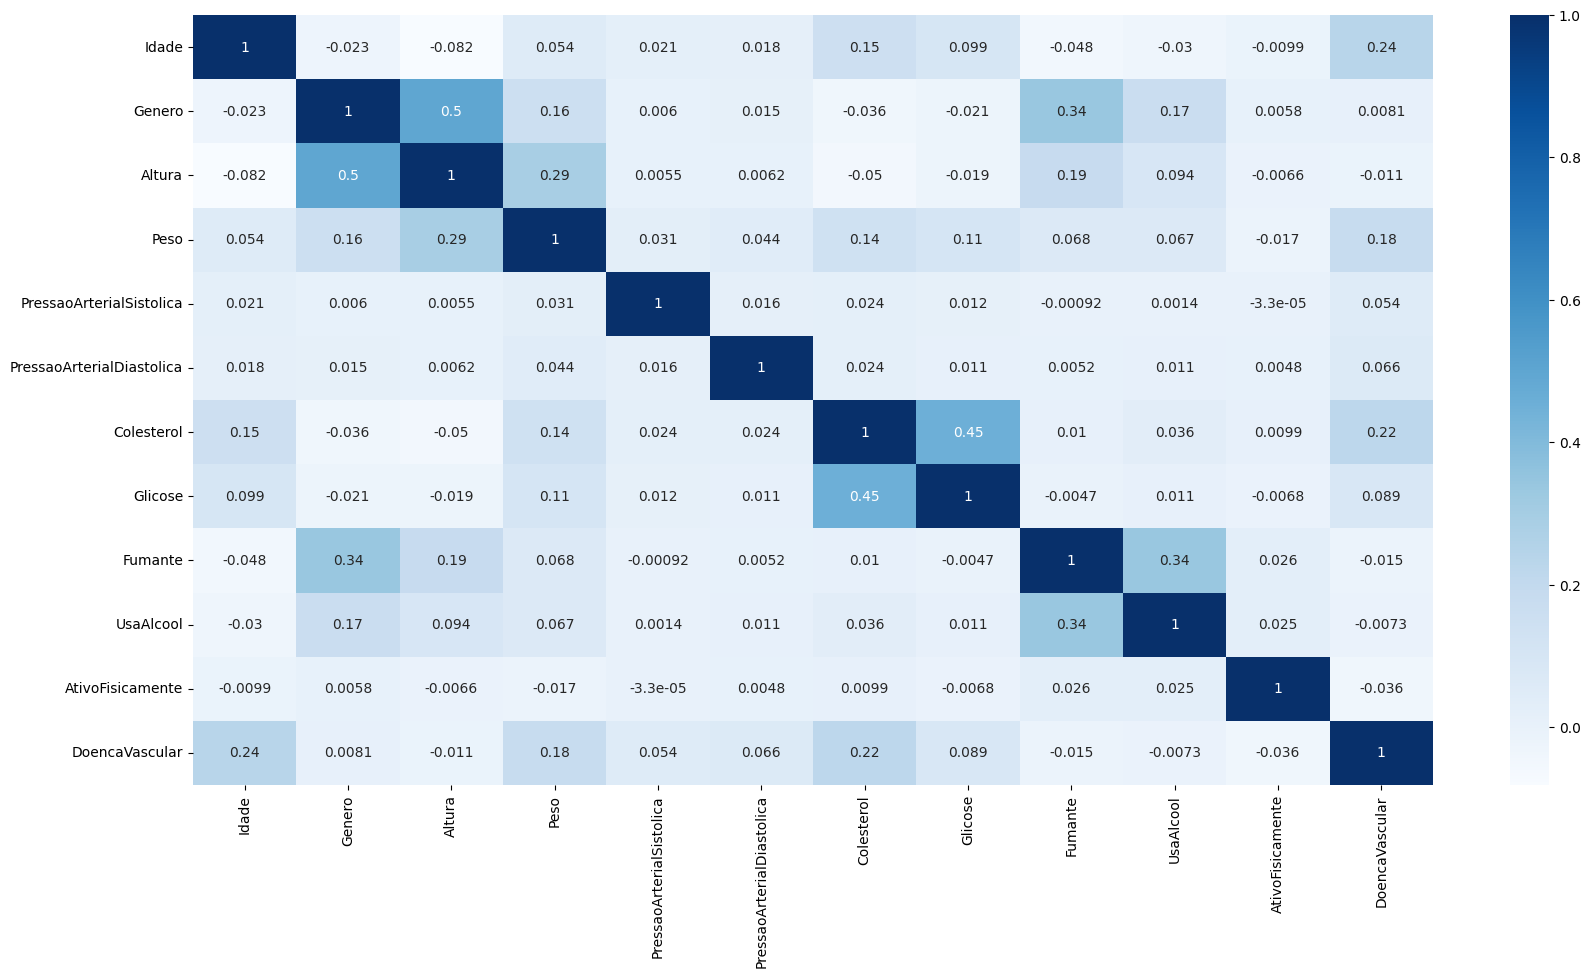

In [ ]:
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
SEED = 1561651
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
test_df.to_csv('test.csv', sep=';', index=False)

In [ ]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler  = ['Idade', 'Altura', 'Peso', 'PressaoArterialSistolica', 'PressaoArterialDiastolica', 'Colesterol', 'Glicose']):
        self.min_max_scaler = min_max_scaler
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [ ]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'DoencaVascular' in df.columns:
            # função smote para superamostrar a classe minoritária para corrigir os dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'DoencaVascular'], df['DoencaVascular'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("O target não está no DataFrame")
            return df


In [ ]:
def pipeline(df):

    pipeline = Pipeline([
        ('min_max_scaler', MinMax()),
        ('oversample', Oversample())
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

In [ ]:
train = pipeline(train_df)

In [ ]:
train.head()

,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
0,0.460472,2,0.772414,0.494737,0.018553,0.014453,0.5,0.5,0,0,1,1
1,0.709098,1,0.717241,0.273684,0.016698,0.013550,0.0,0.0,0,0,1,0
2,0.631901,1,0.710345,0.368421,0.017934,0.014453,0.0,0.0,0,0,1,0
3,0.958343,1,0.779310,0.310526,0.016698,0.013550,0.5,0.0,0,0,0,0
4,0.630430,1,0.786207,0.289474,0.017934,0.014453,0.0,0.0,0,0,0,1


In [ ]:
X_train, y_train = train.loc[:, train.columns != 'DoencaVascular'], train['DoencaVascular']

In [ ]:
test = pipeline(test_df)

In [ ]:
X_test, y_test= test.loc[:, test.columns != 'DoencaVascular'], test['DoencaVascular']

In [ ]:
SEED = 1561651

def roda_modelo(modelo):


    # Treinando modelo com os dados de treino

    modelo.fit(X_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Separando a probabilidade de ter doença, e calculando o KS
    #métrica KS: probabilidade de ser classificado que terá ou não doença.
    data_bom = np.sort(modelo.predict_proba(X_test)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_test)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")
    # Criando matriz de confusão
    predicao = modelo.predict(X_test)
    cm = confusion_matrix(y_test, predicao, normalize='true')
    matriz_confusao = ConfusionMatrixDisplay(np.array(cm))
    matriz_confusao.plot()
    plt.show()

    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))


    print("\nRoc Curve\n")
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()


------------------------------Resultados LogisticRegression()------------------------------

AUC 0.702160577746879
Métrica KS: KstestResult(statistic=0.38175723862501787, pvalue=0.0, statistic_location=0.497245024174124, statistic_sign=1)

Confusion Matrix



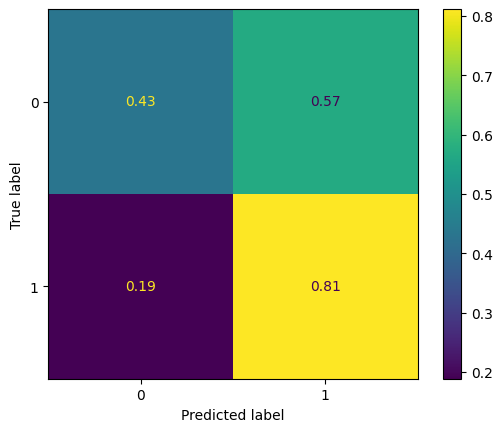


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.43      0.53      7011
           1       0.59      0.81      0.68      7011

    accuracy                           0.62     14022
   macro avg       0.64      0.62      0.61     14022
weighted avg       0.64      0.62      0.61     14022


Roc Curve



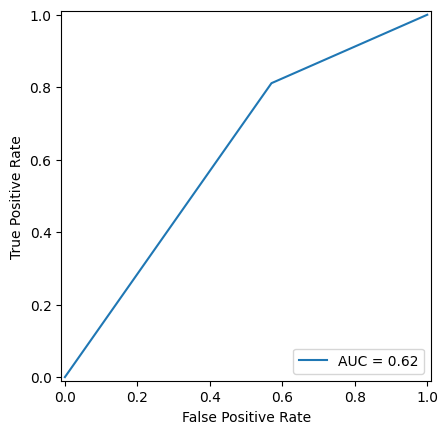

In [ ]:
roda_modelo(modelo_logistico)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.5059905862216517
Métrica KS: KstestResult(statistic=0.005847953216374269, pvalue=0.9690470431461408, statistic_location=0.0, statistic_sign=1)

Confusion Matrix



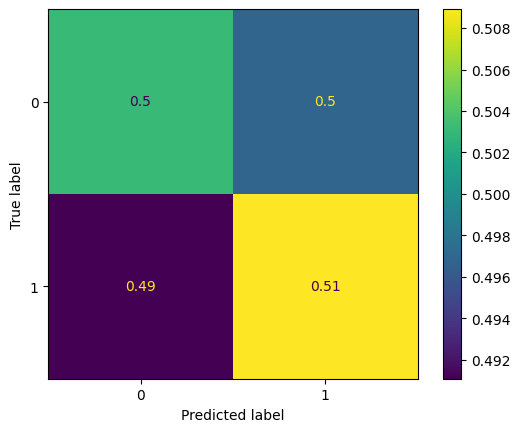


Classification Report
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      7011
           1       0.51      0.51      0.51      7011

    accuracy                           0.51     14022
   macro avg       0.51      0.51      0.51     14022
weighted avg       0.51      0.51      0.51     14022


Roc Curve



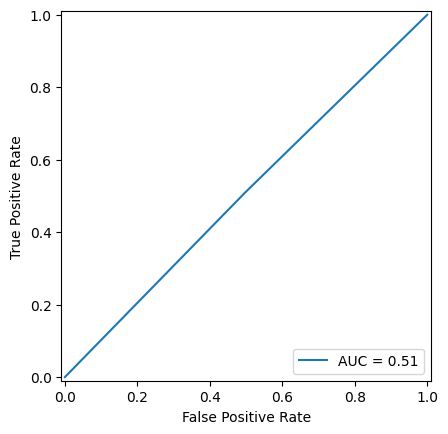

In [ ]:

roda_modelo(modelo_tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier()


------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.7589839110336243
Métrica KS: KstestResult(statistic=0.09506489801740126, pvalue=1.3479280971407217e-55, statistic_location=0.49, statistic_sign=1)

Confusion Matrix



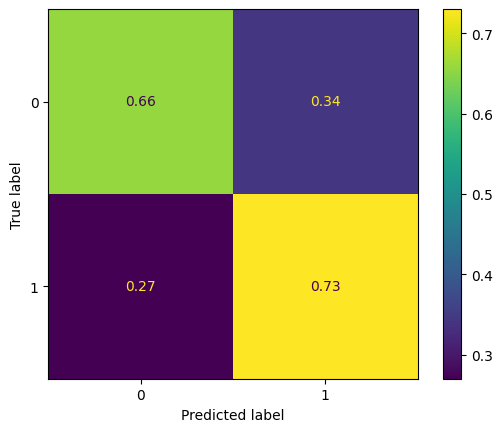


Classification Report
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      7011
           1       0.68      0.73      0.70      7011

    accuracy                           0.69     14022
   macro avg       0.69      0.69      0.69     14022
weighted avg       0.69      0.69      0.69     14022


Roc Curve



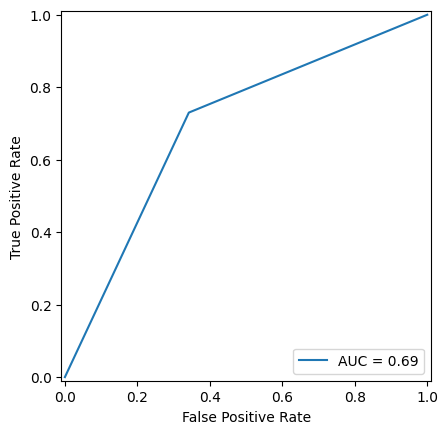

In [ ]:

roda_modelo(modelo_forest)


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.7975936951451131
Métrica KS: KstestResult(statistic=0.10854371701611754, pvalue=2.1664835997672972e-72, statistic_location=0.4273796030577969, statistic_sign=-1)

Confusion Matrix



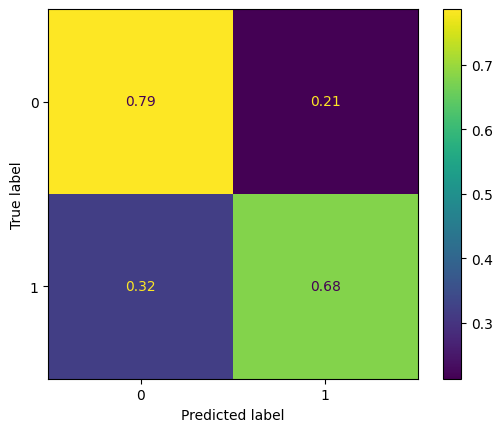


Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7011
           1       0.76      0.68      0.72      7011

    accuracy                           0.73     14022
   macro avg       0.74      0.73      0.73     14022
weighted avg       0.74      0.73      0.73     14022


Roc Curve



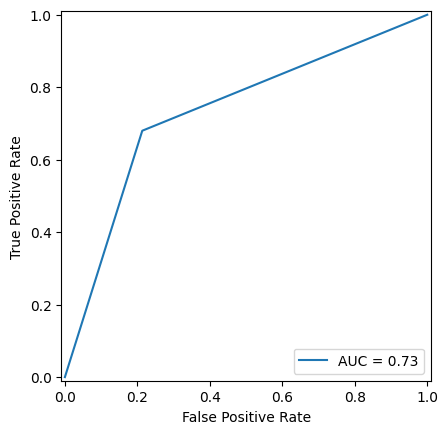

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()
roda_modelo(modelo_xgb)


In [ ]:
#joblib.dump(modelo_xgb, 'xgb.joblib')



*   Criar aplicação
*   Deploy da aplicação
*   Entender ROC
*   Entender KNS






In [ ]:
pipeline_xgb = Pipeline([
        ('min_max_scaler', MinMax()),
        ('oversample', Oversample())])

In [ ]:
!pip install dill

In [ ]:
import dill as pickle
with open('pipeline.pkl', 'wb') as f:
  pickle.dump(pipeline_xgb, 'pipeline.pkl')

TypeError: file must have a 'write' attribute

In [ ]:
loaded_model = joblib.load('pipeline.joblib')

In [ ]:
loaded_model.fit_transform(df)